# CNN
## 합성곱 구현
### 이미지에 필터 적용

In [2]:
#  흑백 이미지 출력 함수
def plot_image(image) :
    plt.imshow(image, cmap = 'gray', interpolations = 'nearest')
    plt.axis('off')

In [3]:
# 칼라 이미지 출력 함수
def plot_color_image(image) :
    plt.imshow(image, interpolations = 'nearest')
    plt.axis('off')

In [4]:
# 이미지를 사용하기 위한 패키지 설치
!pip install Pillow


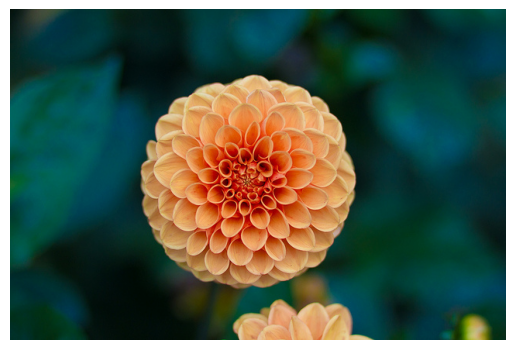

In [8]:
import PIL.Image as Image
import numpy as np
import matplotlib.pyplot as plt
 
china = np.array(Image.open('data_ML/china.jpg')) / 255
flower = np.array(Image.open('data_ML/flower.jpg')) / 255

images = np.array([china, flower])

plt.imshow(flower)
plt.axis('off')
plt.show()

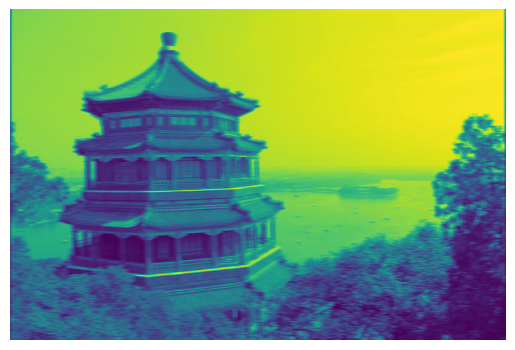

In [13]:
# 필터 생성
batch_size, height, width, channels = images.shape

# 필터 생성
filters = np.zeros(shape=(7, 7, channels, 2), dtype = np.float32)

filters[:, 3, :, 0] = 1 # 세로 방향 필터 : 가운데 열에만 1을 대입
# print(filters)

filters[3, :, :, 1] = 1 # 가로 방향 필터 : 가운데 행에만 1을 대입
# print(filters)

# 합성곱 적용
# tf.nn.conv2d 
# images(첫번째 매개변수)는 입력의 미니 배치 (4D 텐서)
# filters 는 적용된 일련의 필터(4D 텐서)
# strides 는 1개나 4개의 원소를 갖는 1D 배열로 지정할 수 있는데 배열로
# 설정할 때는 첫번째와 마지막은 1이어야 하고 두번째가 수직 그리고 
# 세번째가 수평 스트라이드 입니다.
# padding은 VALID 와 SAME 중 하나로 
# VALID 를 설정하면 제로 패딩을 사용하지 않는 것이고 SAME을 사용하면 제로 패딩을 사용
# 실제 사용은 데부분 
# keras.layers.Conv2D(filters = ?, kernel_size = ?, strides =?, padding =?, activation = ?)
# 을 이용

import tensorflow as tf
outputs = tf.nn.conv2d(images, filters, strides = 1, padding = 'SAME')

plt.imshow(outputs[0, :, :, 1], cmap ='gray')
plt.axis('off')
plt.show()

## 풀링
### Max pooling

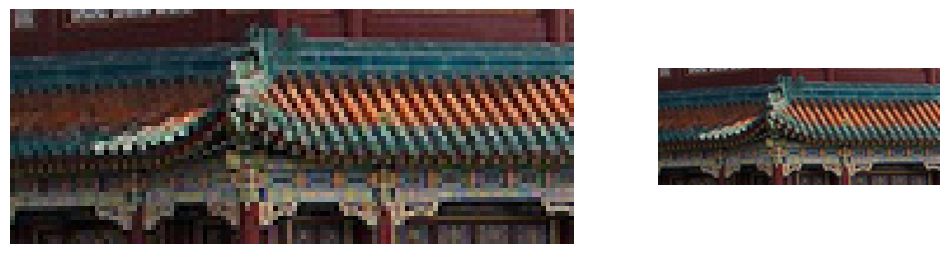

In [23]:
from tensorflow import keras
import matplotlib as mpl

# 최대 풀링 층을 생성 - 이미지의 1/4 데이터만 가지고 생성
# 2*2 영역 중 가장 큰 데이터만 사용
max_pool = keras.layers.MaxPool2D(pool_size = 2)

# 이미지를 자르는 함수
def crop(images) :
    return images[150:200, 130:250]

# 이미지 자르기
cropped_images = np.array([crop(image) for image in images], dtype = np.float32)
# Pooling 적용
output = max_pool(cropped_images)

fig = plt.figure(figsize = (12, 8))
gs = mpl.gridspec.GridSpec(nrows = 1, ncols = 2, width_ratios = [2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(cropped_images[0])
ax1.axis('off')

ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(cropped_images[0])
ax2.axis('off')

plt.show()

### Average Pooling

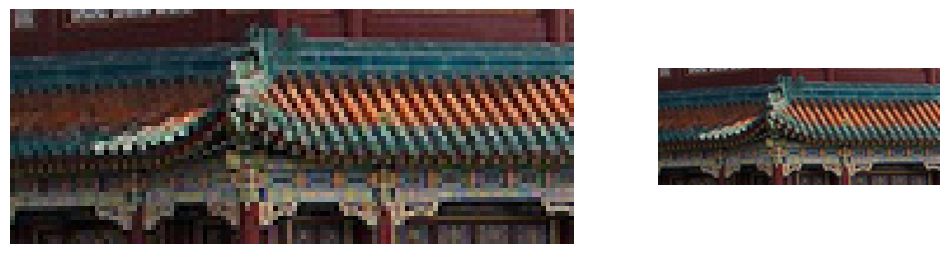

In [24]:
from tensorflow import keras
import matplotlib as mpl

# 평균 풀링 층을 생성 - 이미지의 1/4 데이터만 가지고 생성
# 2*2 영역 중 가장 큰 데이터만 사용
avg_pool = keras.layers.AvgPool2D(pool_size = 2)

# 이미지를 자르는 함수
def crop(images) :
    return images[150:200, 130:250]

# 이미지 자르기
cropped_images = np.array([crop(image) for image in images], dtype = np.float32)
# Pooling 적용
output = avg_pool(cropped_images)

fig = plt.figure(figsize = (12, 8))
gs = mpl.gridspec.GridSpec(nrows = 1, ncols = 2, width_ratios = [2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(cropped_images[0])
ax1.axis('off')

ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(cropped_images[0])
ax2.axis('off')

plt.show()

In [25]:
# GlobalAvgPool2D 
# 특성 맵 전체의 평균을 사용하기 때문에 채널 당 하나의 값만 유지
global_avg_pool = keras.layers.GlobalAvgPool2D()
global_avg_pool(cropped_images)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.28310943, 0.2441023 , 0.22670619],
       [0.48978567, 0.4544353 , 0.34281188]], dtype=float32)>

# CNN 을 이용한 패션 이미지 분류

In [39]:
# 데이터 가져오기
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

# 스케일링 - 흑백 이미지라서 차원을 1개 늘려서 255로 나눔
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
# print(train_scaled.shape)

from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled,
                                                                     train_target,
                                                                    test_size = 0.2,
                                                                    random_state = 42)

In [30]:
# 모델 만들기
model = keras.Sequential()

# 입력 층을 합성곱 층을 사용
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu',
                             padding = 'same', input_shape=(28, 28,  1)))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu',
                             padding = 'same'))
model.add(keras.layers.MaxPooling2D(2))

#입력 데이터를 1차원으로 만들어주는 층
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))

#드랍 아웃 적용
model.add(keras.layers.Dropout(0.4))

model.add(keras.layers.Dense(10, activation = 'softmax'))

C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [31]:
# 모델 확인
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# 모델 훈련
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

# 체크 포인트
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-cnn-model.keras")
# 2번의 epoch 동안 점수가 좋아지지 않으면 조기 종료
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, 
                                                 restore_best_weights = True)

history = model.fit(train_scaled, train_target, epochs = 20,
                   validation_data = (val_scaled, val_target),
                   callbacks = [checkpoint_cb, early_stopping_cb])
# 아래 합성곱 층으로 내려갈 때 뉴런의 개수를 늘렸는데 이유는 중간에 MaxPooling2D
# (Dropout 도) 적용했기 때문에 실제 파라미터의 개수가 줄어들어서 사용되므로
# 뉴런의 개수를 늘려도 실제 늘어난 것이 아님

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7452 - loss: 0.7033 - val_accuracy: 0.8734 - val_loss: 0.3379
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8721 - loss: 0.3543 - val_accuracy: 0.8937 - val_loss: 0.2820
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8897 - loss: 0.2996 - val_accuracy: 0.9076 - val_loss: 0.2504
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9047 - loss: 0.2628 - val_accuracy: 0.9038 - val_loss: 0.2614
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9122 - loss: 0.2401 - val_accuracy: 0.9113 - val_loss: 0.2322
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9203 - loss: 0.2127 - val_accuracy: 0.9124 - val_loss: 0.2347
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9277 - loss: 0.1969 - val_accuracy: 0.9190 - val_loss: 0.2191
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9335 - loss: 0

In [41]:
#  평가
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9186 - loss: 0.2148


[0.21905551850795746, 0.9190000295639038]

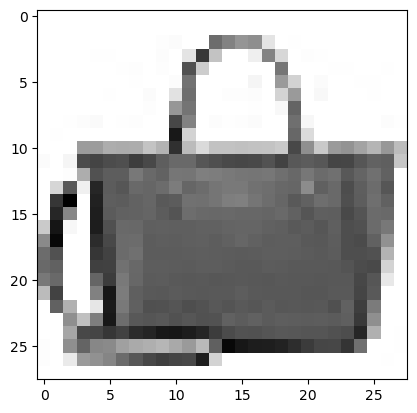

In [42]:
# 클래스 이름
classes = ['티셔츠', '바지', '스웨터', '드레스','코트',
          '샌달', '셔츠', '스니커즈','가방', '앵클 부츠']

plt.imshow(val_scaled[0].reshape(28, 28), cmap = 'gray_r')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[3.1374122e-15 1.9018651e-20 3.5490125e-17 5.0250367e-16 8.1268041e-14
  4.2308629e-11 9.1396651e-15 5.1954576e-16 1.0000000e+00 3.2862154e-13]]
가방


<function matplotlib.pyplot.show(close=None, block=None)>

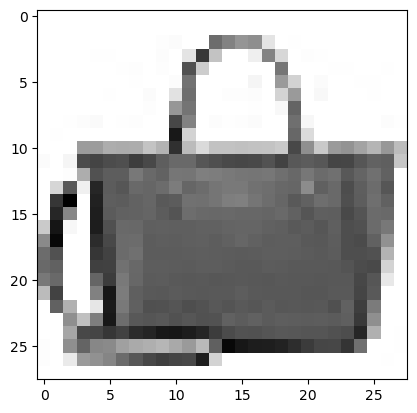

In [44]:
# 예측
preds= model.predict(val_scaled[0:1])
print(preds)
print(classes[np.argmax(preds)])

plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show

In [46]:
# 평가 - test 셋
# 훈련에 사용하는 데이터가 스케일링이 되어 있다면 예측에 사용하는 데이터도
# 스케일을 해야합니다.
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_input, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8344 - loss: 60.8991


[58.67375183105469, 0.8364999890327454]

In [47]:
# 모델 저장
# 이전 API 에서는 확장자를 h5 를 권장했는데 최근에는 keras 를 권장
model.save('best-cnn-models.keras')

## 교통 표지판 데이터 이용

In [51]:
# 클래스의 개수와 이미지의 크기를 변수에 저장

# 이 두 개의 값은 절대로 변하지 않을 값
# 변하지 않는 값을 저장할 변수의 이름은 모두 대문자로 작성하는 것이 좋습니다.
# SNAKE 표기법
N_CLASSES  = 43
RESIZED_IMAGE = (32, 32)

import matplotlib.pyplot as plt
import glob # 디렉토리를 핸들링 할때 사용하는 모듈
from skimage.color import rgb2lab
from skimage.transform import resize
import numpy as np

from collections import namedtuple 

In [84]:
# 이름이 있는 튜플 생성 - 다른 언어에서는 튜플을 이런 형태로 만듭니다.
# 튜플의 원래 목적은 변경할 수 없는 하나의 행 ( record, row) 를 표현하기 위한 것으로
# 인덱스가 아니라 이름으로 구별하는 것이 타당
Dataset = namedtuple('Dataset', ['X', 'y'])
# print(dir(Dataset))

# 포맷 변경해주는 함수
def to_tf_format(imgs) :
    return np.stack([img[:, :, np.newaxis] for img in imgs], axis = 0).astype(np.float32)

# 이미지 디렉토리에 있는 모든 이미지들에 라벨링을 하기 위한 작업
# 이미지의 크기 변겯오 여기서 수행
def read_dataset_ppm(rootpath, n_labels, resize_to) :
    # 이미지 데이터와 라벨을 저장할 list
    images = []
    labels = []
    
    for c in range(n_labels) :
        # 루트 경로/00001/ 형태로 이미지 경로를 생성
        full_path = rootpath + "/" + format(c, '05d') + "/"
        # 각 이미지 디렉토리를 순회하면서 확장자가 ppm 인 파일의 경로를 가지고
        for img_name in glob.glob(full_path + '*.ppm') :
            # 이미지 읽어오기
            img = plt.imread(img_name).astype(np.float32)
            # 이미지를 정규화
            img = rgb2lab(img / 255.0)[:, :, 0]
            # 이미지 크기 조정
            if resize_to :
                img  = resize(img, resize_to, mode ='reflect')
            # 라벨 생성
            # 43개 짜리 배열을 만들어서 자신의 인덱스에 해당하는 값에만 1을 대입
            label = np.zeros((n_labels, ), dtype = np.float32)
            label[c] = 1.0
            
            images.append(img.astype(np.float32))
            labels.append(label)
            
    return Dataset(X = to_tf_format(images).astype(np.float32),
                  y = np.matrix(labels).astype(np.float32))

In [83]:
# 이미지 전처리를 수행해서 데이터 만들기
dataset = read_dataset_ppm('data_ML/GTSRB/Final_Training/Images/',
                          N_CLASSES,
                          RESIZED_IMAGE)
print(dataset.X.shape)
print(dataset.y.shape)

(39209, 32, 32, 1)
(39209, 43)


[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


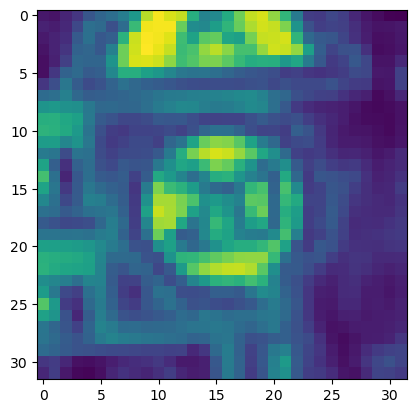

In [85]:
print(dataset.y[0, :])
plt.imshow(dataset.X[0, :, :, :].reshape(RESIZED_IMAGE))

In [86]:
# 훈련, 테스트 셋 분리
from sklearn.model_selection import train_test_split
idx_train, idx_test = train_test_split(range(dataset.X.shape[0]), test_size = 0.25,
                                      random_state = 42)
X_train = dataset.X[idx_train, :, :, :]
X_test = dataset.X[idx_train, :, :, :]

y_train = dataset.y[idx_train, :]
y_test = dataset.y[idx_train, :]

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)



(29406, 32, 32, 1)
(29406, 32, 32, 1)
(29406, 43)
(29406, 43)


In [88]:
# 모델 만들기
model = keras.Sequential()

# 입력층 - Convolution
model.add(keras.layers.Conv2D(32, kernel_size =3, activation = 'relu',
                             padding = 'same', input_shape = (32, 32, 1)))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(64, kernel_size =3, activation = 'relu',
                             padding = 'same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(128, kernel_size =3, activation = 'relu',
                             padding = 'same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))

model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))

model.add(keras.layers.Dense(43, activation = 'softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │       204,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 43)             │         4,343 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 312,015 (1.19 MB)

 Trainable params: 312,015 (1.19 MB)

 Non-trainable params: 0 (0.00 B)

In [92]:
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [94]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-models.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2,
                                                 restore_best_weights = True)
history = model.fit(X_train, y_train, epochs = 20,
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
919/919 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.0900 - loss: 3.6104
Epoch 2/20
 14/919 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.2532 - loss: 2.5547

C:\Users\USER\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


919/919 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.2854 - loss: 2.3523
Epoch 3/20
919/919 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.5067 - loss: 1.5087
Epoch 4/20
919/919 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.6635 - loss: 1.0428
Epoch 5/20
919/919 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.7516 - loss: 0.7694
Epoch 6/20
919/919 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.7989 - loss: 0.6332
Epoch 7/20
919/919 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8320 - loss: 0.5320
Epoch 8/20
919/919 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8725 - loss: 0.4039
Epoch 9/20
919/919 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8960 - loss: 0.3352
Epoch 10/20
919/919 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9100 - loss: 0.2959
Epoch 11/20
919/919 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9212 - loss: 0.2566
Epoch 12/20
919/919 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9347 - loss: 0.2259
Epoch 13/20
919/919 ━━━━━━━━━━━━━━━━━━━━

In [95]:
print(model.evaluate(X_test, y_test))

919/919 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9939 - loss: 0.0265
[0.02540254034101963, 0.9941168427467346]


In [96]:
!git clone https://github.com/MachineLearning2020/Homework2-Caltech101.git

Cloning into 'Homework2-Caltech101'...
Updating files:  36% (3354/9149)
Updating files:  37% (3386/9149)
Updating files:  38% (3477/9149)
Updating files:  39% (3569/9149)
Updating files:  40% (3660/9149)
Updating files:  41% (3752/9149)
Updating files:  42% (3843/9149)
Updating files:  43% (3935/9149)
Updating files:  44% (4026/9149)
Updating files:  45% (4118/9149)
Updating files:  46% (4209/9149)
Updating files:  47% (4301/9149)
Updating files:  48% (4392/9149)
Updating files:  49% (4484/9149)
Updating files:  50% (4575/9149)
Updating files:  51% (4666/9149)
Updating files:  52% (4758/9149)
Updating files:  53% (4849/9149)
Updating files:  54% (4941/9149)
Updating files:  55% (5032/9149)
Updating files:  56% (5124/9149)
Updating files:  57% (5215/9149)
Updating files:  58% (5307/9149)
Updating files:  59% (5398/9149)
Updating files:  60% (5490/9149)
Updating files:  61% (5581/9149)
Updating files:  62% (5673/9149)
Updating files:  63% (5764/9149)
Updating files:  64% (5856/9149)
Upda

## 이미지 증강

### augmentor 를 이용한 증강

In [98]:
!pip install augmentor

In [99]:
import Augmentor

img = Augmentor.Pipeline('data_ML/sample')

# 좌우 반전
img.flip_left_right(probability = 1.0)

# 상하 반전
img.flip_top_bottom(probability = 1.0)

# 왜곡
img.skew_corner(probability = 1.0)

# 확대
img.zoom_random(probability = 1.0, percentage_area = 0.8)

# 랜덤 지우기
img.random_erasing(probability = 1.0, rectangle_area = 0.3)

# 생성할 샘플 개수 
img.sample(10)


Initialised with 3 image(s) found.
Output directory set to data_ML/sample\output.

Processing <PIL.Image.Image image mode=RGB size=800x533 at 0x24B4427FD10>: 100%|██████████| 10/10 [00:00<00:00, 39.96 Samples/s]


## keras 의 ImageDataGenerator

In [100]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

# 위의 모듈이 없다고 나오면 
#!pip install pillow

In [103]:
# 효과 생성
# 효솨 생성시 주의 : 증강을 하는 이유는 이미지에 변화를 주어서
# 학습 데이터를 많게 해서 성능을 높이기 위해서 수행하기 떄문에
# train_set 에만 수행하면 되지만 rescale 이 있는 경우는 test_set에서도
# 해줘야 합니다.

datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.3,
    height_shift_range = 0.2,
    rescale  = 0.1/ 255.0,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

In [102]:
# 이미지 설정
img = image.load_img('data_ML/sample/elephant.jpg')
# 이미지를 배열
x = image.img_to_array(img)
print(x.shape)
x = x.reshape((1,) + x.shape)
print(x.shape)
# 딥러닝은 이미지를 4차원(tensor)을 요구하는 경우가 많음

(533, 800, 3)
(1, 533, 800, 3)


In [105]:
i = 0
for batch in datagen.flow(x, batch_size = 1,
                          save_to_dir = 'data_ML/sample',
                         save_prefix = 'using_keras',
                         save_format = 'jpeg') :
    i += 1
    if i > 30 :
        break
        